# Back Propagation

## Computational Graph

$$
\frac{\partial z}{\partial z}\frac{\partial z}{\partial t}\frac{\partial t}{\partial x}
= \frac{\partial z}{\partial t}\frac{\partial t}{\partial x}
= \frac{\partial z}{\partial x}
$$

![computational graph](../images/computational_graph.png)

![back propagation](../images/back_propagation.png)

In [2]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

![apple](../images/apple.png)

In [5]:
apple = 100
apple_num = 2
tax = 1.1
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


In [7]:
class AddLayer:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

![apple+orange](../images/apple_orange.png)

In [8]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print(price) 
print(dapple_num, dapple, dorange, dorange_num, dtax) 

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


### ReLU

$$
y=
\begin{cases}
x & (x>0)\\
0 & (x\le 0)
\end{cases},
\quad
\frac{\partial y}{\partial x}=
\begin{cases}
1 & (x>0)\\
0 & (x\le 0)
\end{cases}
$$

![ReLU](../images/ReLU.png)

In [ ]:
class ReLU:
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

### Sigmoid

$$
\begin{aligned}
y&=\frac{1}{1+\exp(-x)}\\
\frac{\partial y}{\partial x}
&=\frac{\exp(-x)}{(1+\exp(-x))^2}\\
&=\frac{1}{1+\exp(-x)}\cdot\frac{\exp(-x)}{1+\exp(-x)}\\
&=y(1-y)\\
\frac{\partial L}{\partial x}&=\frac{\partial L}{\partial y}y(1-y)
\end{aligned}
$$

![sigmoid_back](../images/sigmoid_back.png)
$$
\begin{aligned}
\frac{\partial L}{\partial y}y^2\exp(-x)
&= \frac{\partial L}{\partial y}\frac{1}{(1+\exp(-x))^2}\exp(-x)\\
&= \frac{\partial L}{\partial y}\frac{1}{1+\exp(-x)}\frac{\exp(-x)}{1+\exp(-x)}\\
&= \frac{\partial L}{\partial y}y(1-y)
\end{aligned}
$$
![sigmoid_back2](../images/sigmoid_back2.png)

In [9]:
import numpy as np
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

# Affine

![affine](../images/affine.png)

In [10]:
class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        self.x = None
        self.original_x_shape = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.original_x_shape)
        return dx

### Softmax with Loss

$$
y_i=\frac{e^{a_i}}{\sum_{k=1}^C e^{a_k}},\quad
L=-\sum_{i=1}^C t_i\log y_i,\quad
\frac{\partial L}{\partial y_i}=-\frac{t_i}{y_i},\quad
\frac{\partial y_i}{\partial a_j}=y_i(\delta_{ij}-y_j)\\
\frac{\partial L}{\partial a_j}
=\sum_{i=1}^C \frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial a_j}
=\sum_{i=1}^C\left(-\frac{t_i}{y_i}\right)y_i(\delta_{ij}-y_j)
= -t_j + \left(\sum_{i=1}^C t_i\right) y_j
\sum_i t_i=1 \Rightarrow \frac{\partial L}{\partial a}=y-t\\
$$

![soft with loss](../images/soft_with_loss.png)
![sofw with loss2](../images/soft_with_loss2.png)

In [12]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None   
        self.t = None   

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

In [13]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

In [14]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:4.585469454241351e-10
b1:2.439150864938077e-09
W2:5.524543174510683e-09
b2:1.4033306551530789e-07


In [15]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.18121666666666666 0.1825
0.9070166666666667 0.9119
0.9242 0.9268
0.9386333333333333 0.9379
0.9451 0.9444
0.9541166666666666 0.9521
0.9586333333333333 0.9557
0.9621166666666666 0.9584
0.96615 0.9616
0.9690166666666666 0.9634
0.9715833333333334 0.9632
0.9728333333333333 0.9675
0.97385 0.9684
0.9740166666666666 0.9654
0.9772166666666666 0.9684
0.9770333333333333 0.9693
0.9792 0.9698


In [16]:
import pickle
import os
model_path = '../models/two_layer_net_back.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
with open(model_path, 'wb') as f:
    pickle.dump(network.params, f)
print(f"Model saved to {model_path}")

history_path = '../models/training_history_back.pkl'
history = {
    'train_loss': train_loss_list,
    'train_acc': train_acc_list,
    'test_acc': test_acc_list
}
with open(history_path, 'wb') as f:
    pickle.dump(history, f)
print(f"Training history saved to {history_path}")

Model saved to ../models/two_layer_net_back.pkl
Training history saved to ../models/training_history_back.pkl


In [22]:
import pickle
import os
model_path = '../models/two_layer_net_back.pkl'
history_path = '../models/training_history_back.pkl'
with open(model_path, 'rb') as f:
    loaded_params = pickle.load(f)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network.params = loaded_params
network.layers['Affine1'].W = network.params['W1']
network.layers['Affine1'].b = network.params['b1']
network.layers['Affine2'].W = network.params['W2']
network.layers['Affine2'].b = network.params['b2']

with open(history_path, 'rb') as f:
    history = pickle.load(f)
train_loss_list = history['train_loss']
train_acc_list = history['train_acc']
test_acc_list = history['test_acc']
print(f"Model and history loaded successfully!")
print(f"Iterations: {len(train_loss_list)}, Epochs: {len(train_acc_list)}")
print(f"Test Accuracy: {network.accuracy(x_test, t_test):.4f}")

Model and history loaded successfully!
Iterations: 10000, Epochs: 17
Test Accuracy: 0.9724


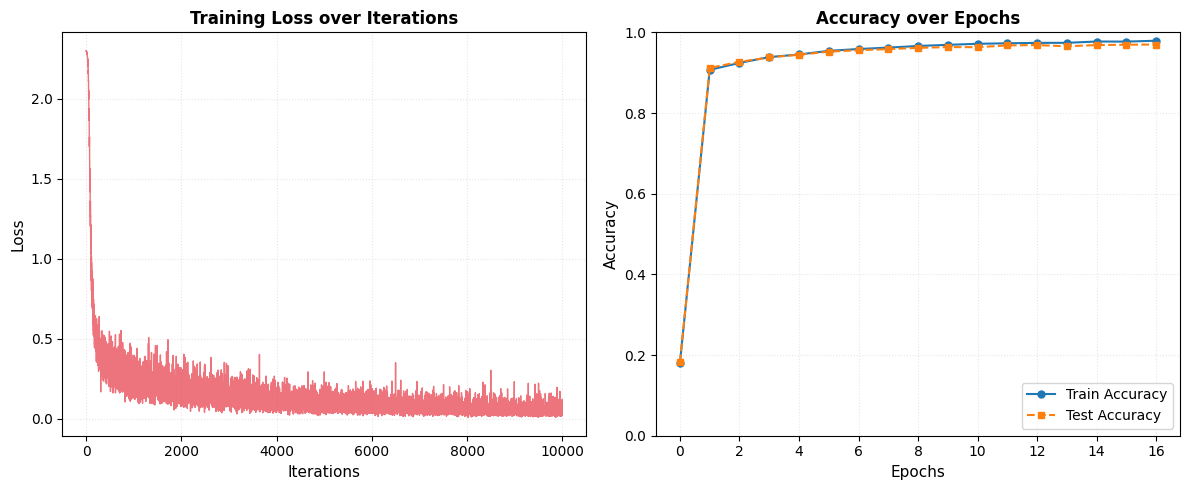

Initial Loss: 2.3007
Final Loss: 0.0522
Loss Reduction: 2.2485

Final Train Accuracy: 0.9792
Final Test Accuracy: 0.9698


In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_loss = np.arange(len(train_loss_list))
plt.plot(x_loss, train_loss_list, color='#E63946', linewidth=1, alpha=0.7)
plt.xlabel("Iterations", fontsize=11)
plt.ylabel("Loss", fontsize=11)
plt.title("Training Loss over Iterations", fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')

plt.subplot(1, 2, 2)
x_acc = np.arange(len(train_acc_list))
plt.plot(x_acc, train_acc_list, marker='o', markersize=5, label='Train Accuracy')
plt.plot(x_acc, test_acc_list, marker='s', markersize=5, linestyle='--', label='Test Accuracy')
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title("Accuracy over Epochs", fontsize=12, fontweight='bold')
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

print(f"Initial Loss: {train_loss_list[0]:.4f}")
print(f"Final Loss: {train_loss_list[-1]:.4f}")
print(f"Loss Reduction: {train_loss_list[0] - train_loss_list[-1]:.4f}")
print(f"\nFinal Train Accuracy: {train_acc_list[-1]:.4f}")
print(f"Final Test Accuracy: {test_acc_list[-1]:.4f}")

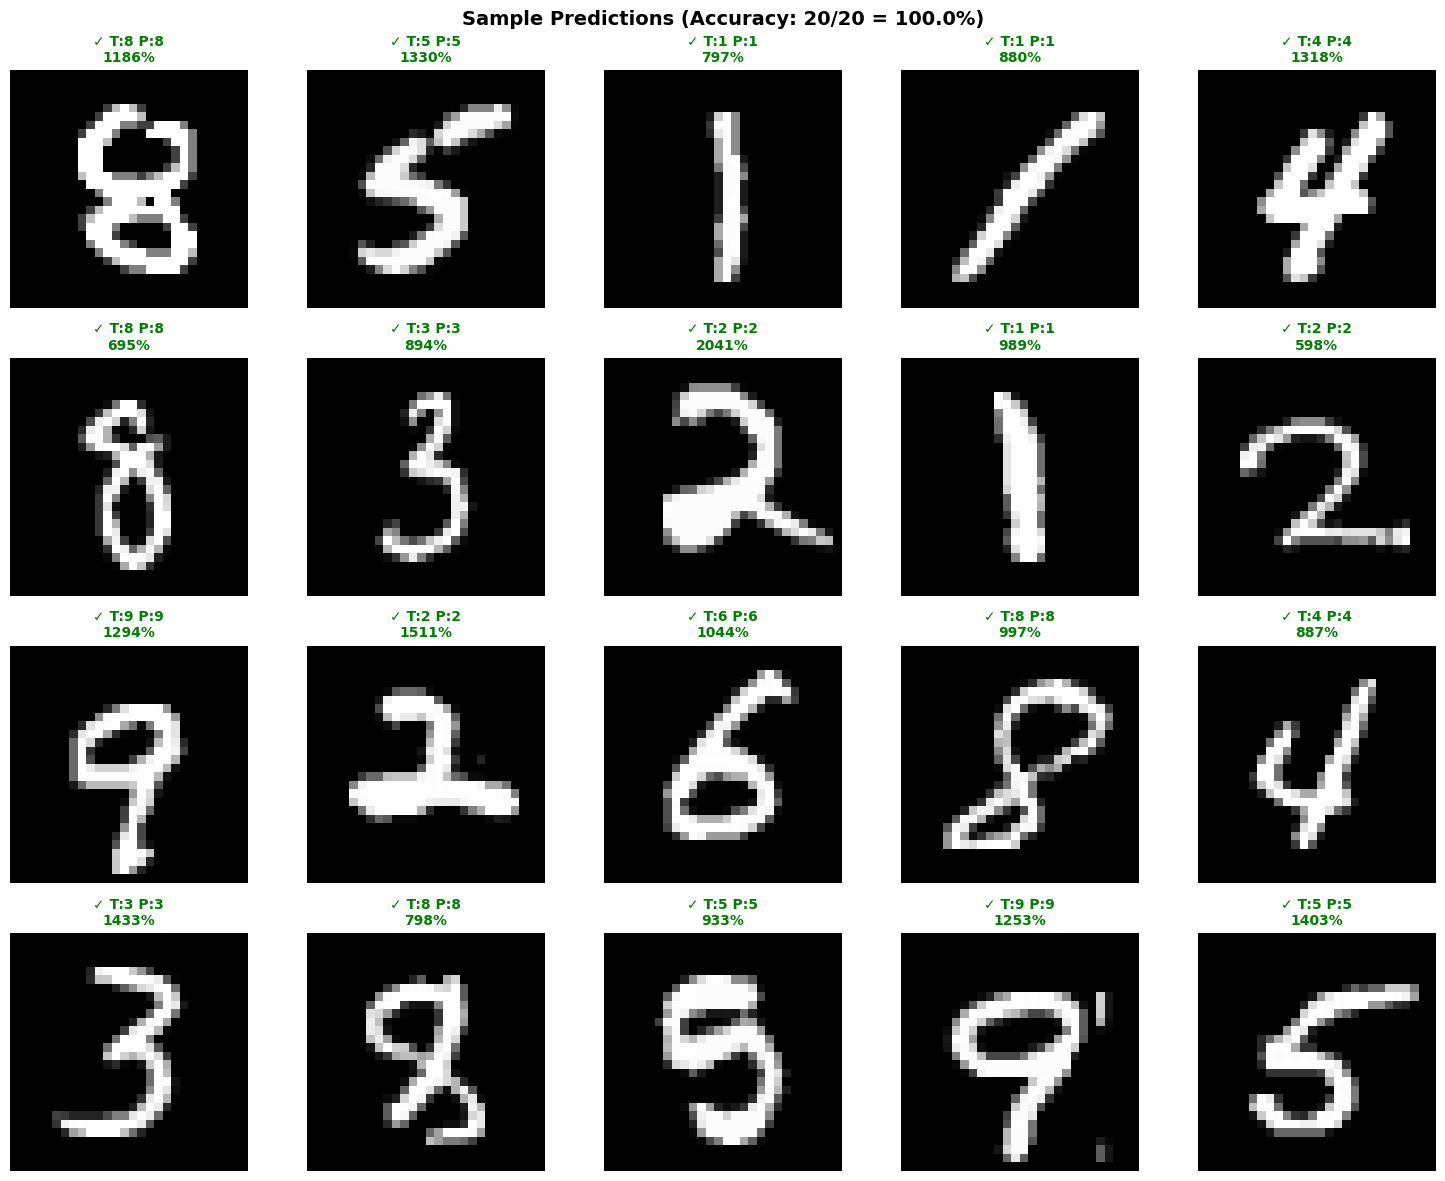


Calculating confusion matrix on test set...


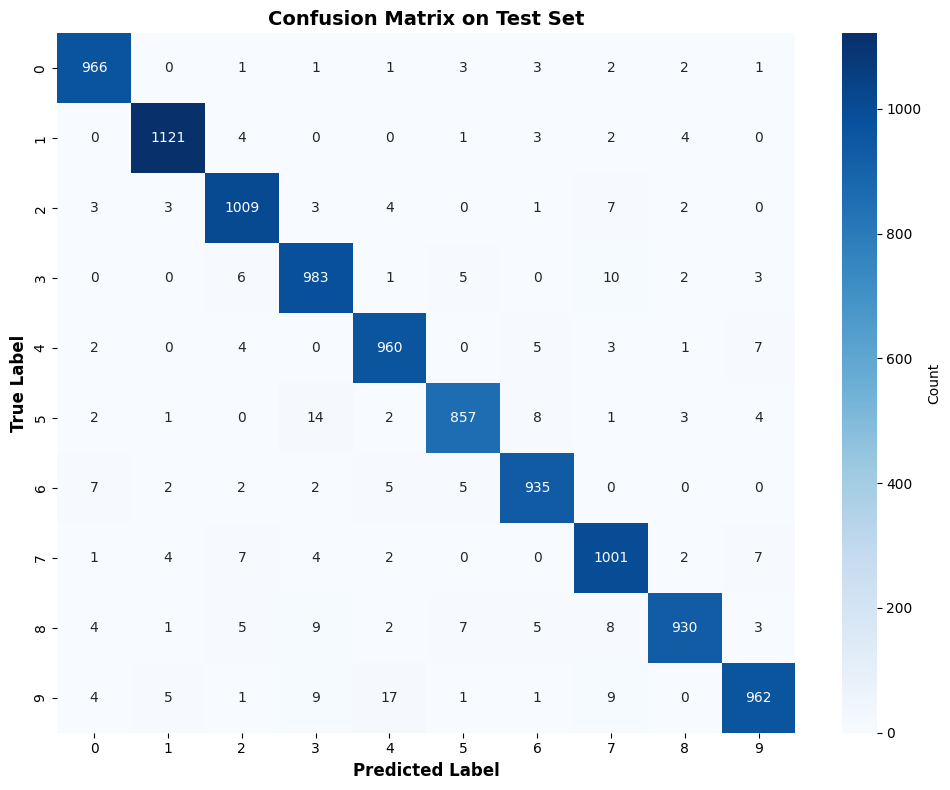


PER-CLASS ACCURACY
Digit 0: 98.57% (966/980)
Digit 1: 98.77% (1121/1135)
Digit 2: 97.77% (1009/1032)
Digit 3: 97.33% (983/1010)
Digit 4: 97.76% (960/982)
Digit 5: 96.08% (857/892)
Digit 6: 97.60% (935/958)
Digit 7: 97.37% (1001/1028)
Digit 8: 95.48% (930/974)
Digit 9: 95.34% (962/1009)

Finding misclassified examples...


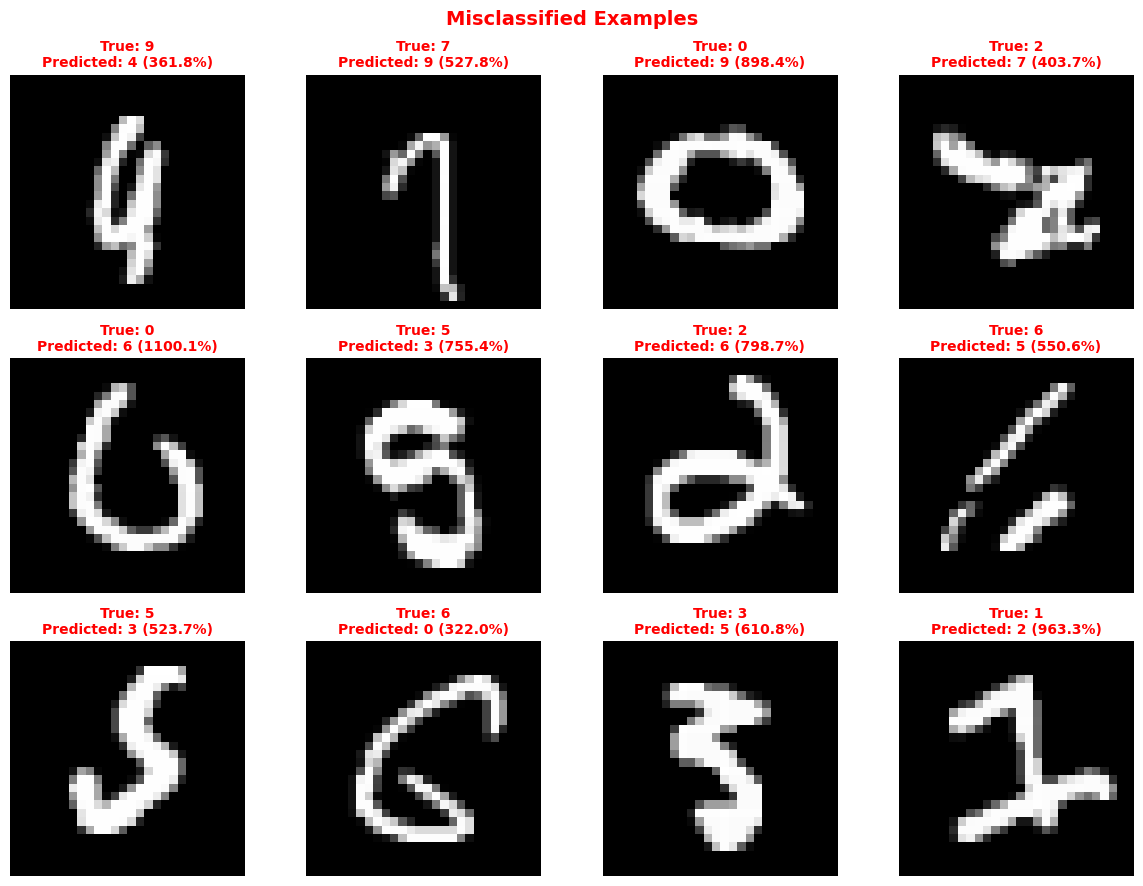

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. 显示预测示例
num_samples = 20
indices = np.random.choice(len(x_test), num_samples, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

correct_count = 0
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    true_label = np.argmax(t_test[idx])
    
    y_pred = network.predict(x_test[idx:idx+1])
    pred_label = np.argmax(y_pred)
    confidence = np.max(y_pred) * 100
    
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    
    is_correct = pred_label == true_label
    if is_correct:
        correct_count += 1
    
    color = 'green' if is_correct else 'red'
    marker = '✓' if is_correct else '✗'
    title = f'{marker} T:{true_label} P:{pred_label}\n{confidence:.0f}%'
    axes[i].set_title(title, color=color, fontsize=10, fontweight='bold')

plt.suptitle(f'Sample Predictions (Accuracy: {correct_count}/{num_samples} = {correct_count/num_samples*100:.1f}%)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. 计算并显示混淆矩阵
print("\nCalculating confusion matrix on test set...")
y_test_pred = network.predict(x_test)
y_test_labels = np.argmax(t_test, axis=1)
y_pred_labels = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix on Test Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. 打印每个数字的准确率
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60)
for i in range(10):
    class_mask = y_test_labels == i
    class_acc = np.mean(y_pred_labels[class_mask] == i)
    total_samples = np.sum(class_mask)
    correct_samples = np.sum((y_pred_labels[class_mask] == i))
    print(f"Digit {i}: {class_acc*100:5.2f}% ({correct_samples}/{total_samples})")
print("="*60)

# 4. 显示一些错误分类的案例
print("\nFinding misclassified examples...")
misclassified_indices = np.where(y_pred_labels != y_test_labels)[0]
num_errors = min(12, len(misclassified_indices))

if num_errors > 0:
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.flatten()
    
    error_indices = np.random.choice(misclassified_indices, num_errors, replace=False)
    
    for i, idx in enumerate(error_indices):
        img = x_test[idx].reshape(28, 28)
        true_label = y_test_labels[idx]
        pred_label = y_pred_labels[idx]
        confidence = np.max(y_test_pred[idx]) * 100
        
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        title = f'True: {true_label}\nPredicted: {pred_label} ({confidence:.1f}%)'
        axes[i].set_title(title, color='red', fontsize=10, fontweight='bold')
    
    plt.suptitle('Misclassified Examples', fontsize=14, fontweight='bold', color='red')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified examples found!")

Softmax 常与交叉熵损失配对，是因为二者在反向传播时会发生“巧妙抵消”：交叉熵对 $y$ 的导数里含有 $1/y$，而 softmax 的导数里含有 $y(1-y)$ 与交叉项，合并后能把复杂的雅可比矩阵化简，最终对 logits 的梯度直接变成 $y-t$，也就是“预测概率减去真实分布”的简单形式 $(y_1-t_1,\;y_2-t_2,\;y_3-t_3)$，既直观又数值稳定；同理，在回归中用恒等输出配平方和误差，因恒等函数导数为 1，平方误差对输出的导数本来就是 $y-t$，所以反传同样得到这种“漂亮”的残差形式——这并非偶然，而是损失函数与输出层激活函数为便于高效、稳定训练而成对设计的结果。

- 通过使用计算图，可以直观地把握计算过程。  
- 计算图的节点是由局部计算构成的。局部计算构成全局计算。  
- 计算图的正向传播进行一般的计算。通过计算图的反向传播，可以计算各个节点的导数。  
- 通过将神经网络的组成元素实现为层，可以高效地计算梯度（反向传播法）。  
- 通过比较数值微分和误差反向传播法的结果，可以确认误差反向传播法的实现是否正确（梯度确认）。